## Drgania i dzwięk
- Drganie $x=A\sin(2\pi f t)$ ma amplitudę $A$ i częstotliwość $f$.
- Częśtotliwość $f$ mierzymy w Hertzach  1 Hz=1/s
- Proszę zerknąć na stonę Geogebry https://www.geogebra.org/m/cNEtsbvC

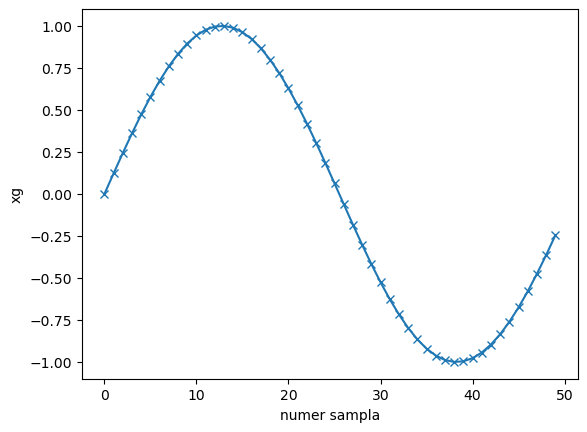

In [1]:
import numpy as np
from numpy import pi,sin
import sounddevice as sd
import matplotlib.pyplot as plt
fs = 20000 # Hz

dt=1/fs

t1=np.arange(0,1,dt)
t2=np.arange(0,1/2.,dt)
t4=np.arange(0,1/4.,dt)
t8=np.arange(0,1/8.,dt)

# Częstotliwość w Hz=1/s
fc=261.63;
fd=293.66;
fe=329.631;
ff=349.23;
fg=392.00;

xg=sin(2*pi*fg*t4);
xe=sin(2*pi*fe*t4);
xf=sin(2*pi*ff*t4);
xd=sin(2*pi*fd*t4);
xc8=sin(2*pi*fc*t8);
xe8=sin(2*pi*fe*t8);
xg2=sin(2*pi*fg*t2);
xc2=sin(2*pi*fc*t2);

x=np.concatenate((xg,xe,xe, xf, xd, xd, xc8, xe8, xg2 ,xg ,xe, xe ,xf, xd, xd ,xc8 ,xe8 ,xc2));
#x=np.concatenate((xd, 2*xd ));

plt.plot(x[:50],'x-')
#plt.xlim((0,0.025))
plt.ylabel("xg")
plt.xlabel('numer sampla')
plt.show()



In [2]:
sd.play(x,fs)
print(x)

[ 0.          0.12283938  0.24381814 ... -0.98693463 -0.97037455
 -0.94726253]


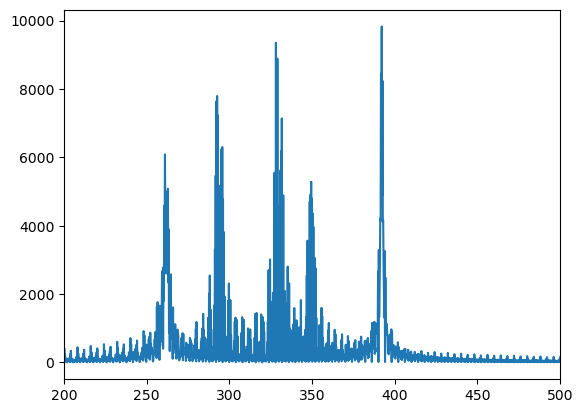

In [3]:
Fw=np.fft.fft(x)
Fws=np.fft.fftshift(Fw)
f=np.linspace(-0.5,0.5,Fw.shape[0])*fs
plt.plot(f,np.abs(Fws))
plt.xlim((200,500))
plt.show()

In [4]:
Fws

array([-3.12908169-3.33066907e-15j,  0.44408077+6.61530703e-03j,
        2.12161649+7.15521927e-01j, ...,  0.43108276-8.93929664e-03j,
        2.12161649-7.15521927e-01j,  0.44408077-6.61530703e-03j])

Text(0.5, 0, 'Time [sec]')

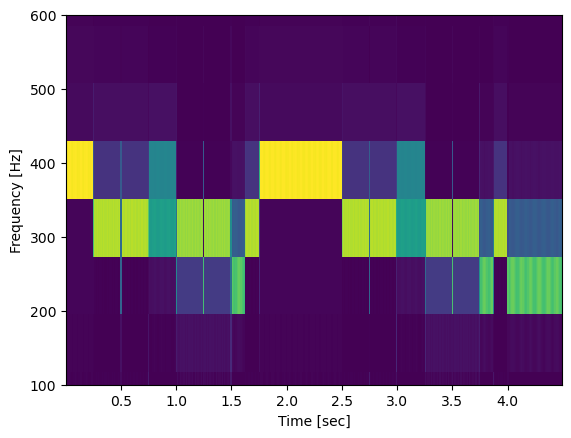

In [5]:
import scipy.signal as sig
import matplotlib.pyplot as plt
#fs=1200
[xs, tt, Sxx] = sig.spectrogram(x, fs)
plt.pcolormesh(tt, xs, Sxx)
plt.ylim((100,600))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
